### Loading features

In [38]:
// %%javascript
// IPython.OutputArea.auto_scroll_threshold = 1000;

<IPython.core.display.Javascript object>

In [8]:
import scraper
import features
import pandas as pd
import numpy as np
from IPython.core import display as ICD
from sklearn.externals import joblib
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import IPython
%matplotlib inline
pd.options.display.max_columns = 999

X = joblib.load('2015Skaters.p')
X = X.sort_values(['DateTimestamp', 'GameName'])
misc_cols = ['GameNum', 'Player', 'GameName', 'DateTimestamp']
data = X.drop(misc_cols, axis=1)
cols = data.columns.values
outputs = [x for x in cols if "O_" in x]
features = [x for x in cols if x not in outputs]
print(outputs)
print(features)
ICD.display(data)

['O_Goals', 'O_Assists', 'O_Blocks', 'O_Shorthanded', 'O_Shots']
['Num', 'TS_Goals', 'TS_Assists', 'TS_PlusMinus', 'TS_SoG', 'TS_Shot%', 'TS_ATOI', 'TS_iCF', 'TS_SATF', 'TS_SATA', 'TS_ZSO', 'TS_HIT', 'TS_BLK', 'TM_Goals', 'Opp_GA', 'Opp_SA', 'Opp_SV%']


,Num,O_Goals,O_Assists,O_Blocks,O_Shorthanded,O_Shots,TS_Goals,TS_Assists,TS_PlusMinus,TS_SoG,TS_Shot%,TS_ATOI,TS_iCF,TS_SATF,TS_SATA,TS_ZSO,TS_HIT,TS_BLK,TM_Goals,Opp_GA,Opp_SA,Opp_SV%
22139,43.0,0.0,1.0,2.0,0.0,6.0,0.372093,0.465116,6.0,3.139535,0.118519,1069.139535,5.348837,21.162791,14.139535,9.069767,1.093023,0.255814,3.441860,2.272727,28.333333,0.919786
22140,43.0,0.0,1.0,0.0,0.0,1.0,0.325581,0.441860,7.0,2.767442,0.117647,1009.162791,5.232558,21.418605,13.139535,8.558140,0.139535,0.302326,3.441860,2.272727,28.333333,0.919786
22141,43.0,0.0,0.0,0.0,0.0,3.0,0.558140,0.627907,14.0,3.790698,0.147239,1161.162791,6.883721,24.093023,15.348837,9.837209,0.930233,0.395349,3.441860,2.272727,28.333333,0.919786
22142,39.0,0.0,0.0,1.0,0.0,1.0,0.025641,0.102564,-1.0,0.820513,0.031250,1248.487179,1.871795,14.384615,19.794872,4.487179,0.461538,1.410256,2.700000,2.285714,26.392857,0.913396
22143,37.0,1.0,0.0,1.0,0.0,1.0,0.081081,0.054054,-1.0,1.000000,0.081081,680.675676,1.621622,6.648649,11.675676,1.837838,1.432432,0.540541,2.700000,2.285714,26.392857,0.913396
22144,43.0,0.0,0.0,1.0,0.0,0.0,0.069767,0.395349,12.0,1.790698,0.038961,1411.627907,3.906977,25.186047,22.860465,7.837209,1.209302,1.906977,3.441860,2.272727,28.333333,0.919786
22145,41.0,0.0,0.0,0.0,0.0,1.0,0.170732,0.170732,6.0,1.024390,0.166667,787.365854,1.804878,11.463415,14.121951,3.731707,1.268293,0.682927,3.441860,2.272727,28.333333,0.919786
22146,40.0,0.0,0.0,2.0,0.0,1.0,0.125000,0.175000,7.0,1.675000,0.074627,796.775000,3.100000,11.450000,13.425000,3.350000,1.025000,0.775000,3.441860,2.272727,28.333333,0.919786
22147,43.0,0.0,0.0,2.0,0.0,0.0,0.093023,0.232558,15.0,0.930233,0.100000,1199.883721,2.511628,17.395349,20.906977,5.604651,0.930233,2.116279,3.441860,2.272727,28.333333,0.919786
22148,40.0,0.0,0.0,0.0,0.0,6.0,0.150000,0.225000,6.0,1.575000,0.095238,826.600000,3.025000,13.925000,12.250000,4.675000,0.550000,0.325000,3.441860,2.272727,28.333333,0.919786


In [20]:
ICD.display(data.describe())

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Num,O_Goals,O_Assists,O_Blocks,O_Shorthanded,O_Shots,TS_Goals,TS_Assists,TS_PlusMinus,TS_SoG,TS_Shot%,TS_ATOI,TS_iCF,TS_SATF,TS_SATA,TS_ZSO,TS_HIT,TS_BLK,TM_Goals,Opp_GA,Opp_SA,Opp_SV%
count,22139.000000,22139.000000,22139.000000,22100.000000,22139.000000,22139.000000,22021.000000,22021.000000,22139.000000,22021.000000,22139.000000,22021.000000,22021.000000,22021.000000,22021.000000,22021.000000,22021.000000,22021.000000,22139.000000,21995.000000,21995.000000,21995.000000
mean,48.690772,0.151678,0.253896,0.802443,0.009666,1.658250,0.145398,0.242931,0.228420,1.639112,0.081369,981.534475,3.049218,15.158558,14.609763,5.572974,1.321438,0.775066,2.678286,2.305852,27.626441,0.916103
std,18.388932,0.403966,0.520249,1.104058,0.100575,1.519772,0.117516,0.159106,8.422712,0.741608,0.053071,242.787295,1.322693,5.043758,3.988569,2.327070,0.820039,0.573363,0.253923,0.319278,2.545760,0.013583
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-36.000000,0.000000,0.000000,105.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.902439,0.000000,3.000000,0.666667
25%,40.000000,0.000000,0.000000,NaN,0.000000,1.000000,NaN,NaN,-5.000000,NaN,0.044643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.490909,NaN,NaN,NaN
50%,50.000000,0.000000,0.000000,NaN,0.000000,1.000000,NaN,NaN,0.000000,NaN,0.079470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.666667,NaN,NaN,NaN
75%,62.000000,0.000000,0.000000,NaN,0.000000,2.000000,NaN,NaN,5.000000,NaN,0.115385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.830769,NaN,NaN,NaN
max,83.000000,4.000000,4.000000,10.000000,2.000000,11.000000,1.000000,1.333333,35.000000,7.000000,1.000000,1749.558824,10.285714,31.482759,27.723684,12.895522,8.000000,5.000000,3.441860,4.000000,34.000000,1.000000


### Scatter plots of individual features vs. outputs

['O_Goals', 'O_Assists', 'O_Blocks', 'O_Shorthanded', 'O_Shots']
['Num', 'TS_Goals', 'TS_Assists', 'TS_PlusMinus', 'TS_SoG', 'TS_Shot%', 'TS_ATOI', 'TS_iCF', 'TS_SATF', 'TS_SATA', 'TS_ZSO', 'TS_HIT', 'TS_BLK', 'TM_Goals', 'Opp_GA', 'Opp_SA', 'Opp_SV%']


C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


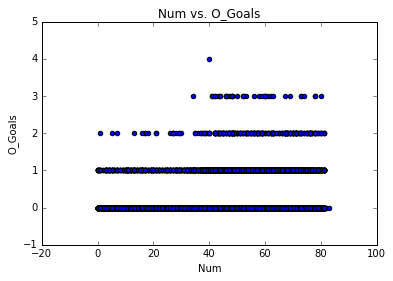

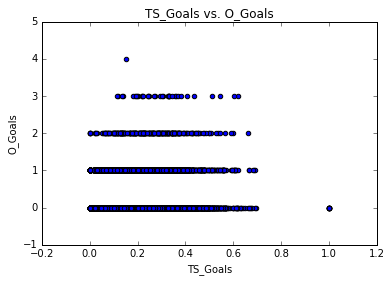

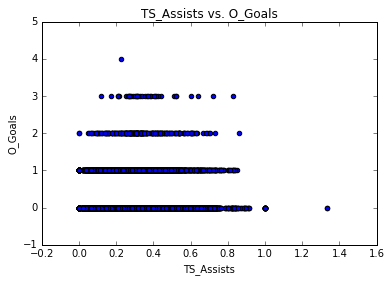

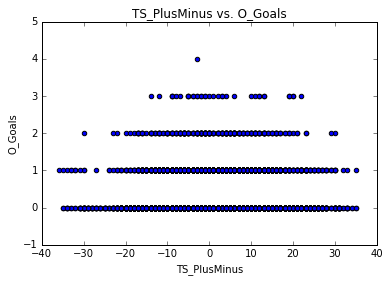

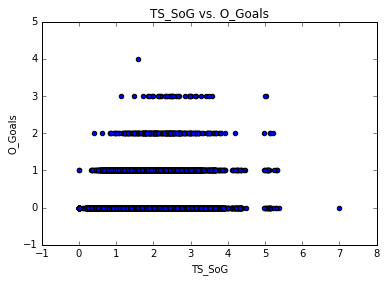

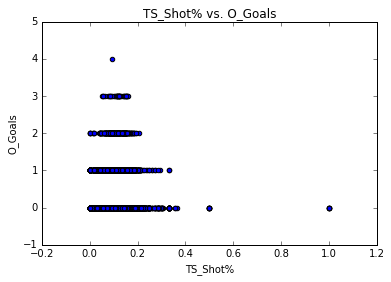

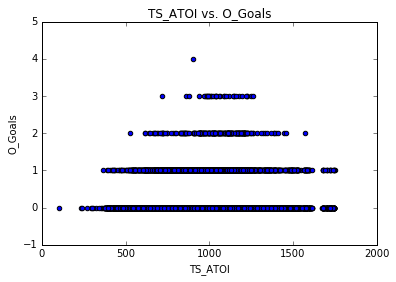

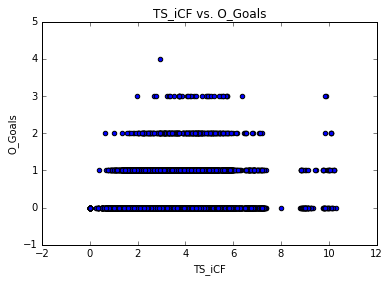

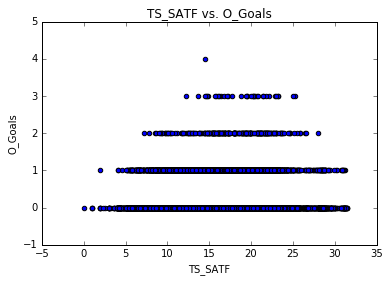

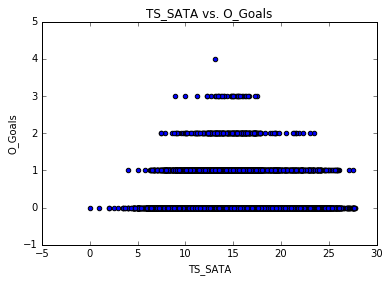

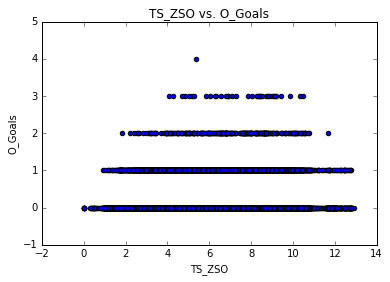

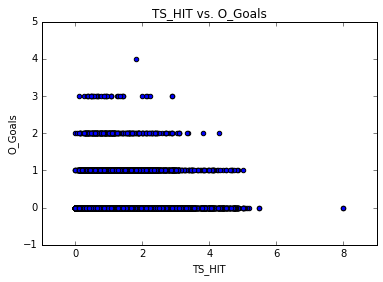

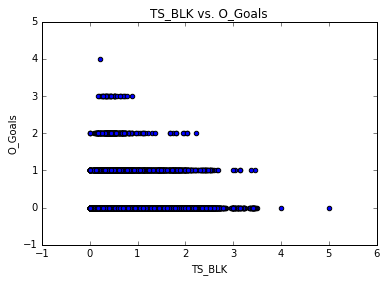

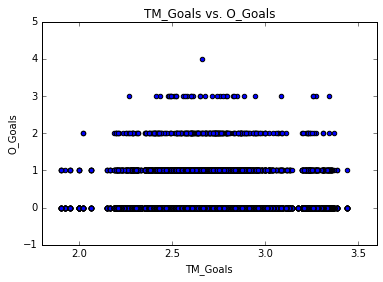

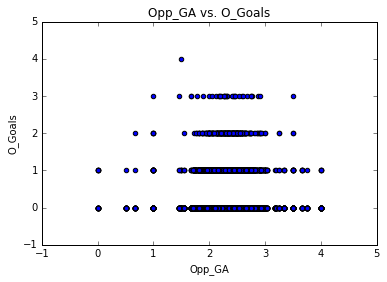

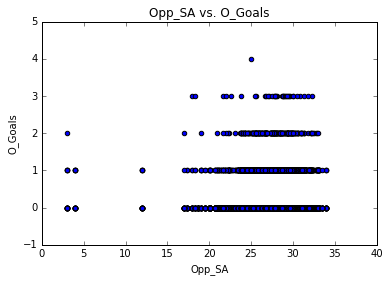

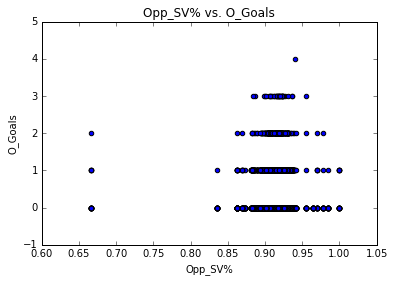

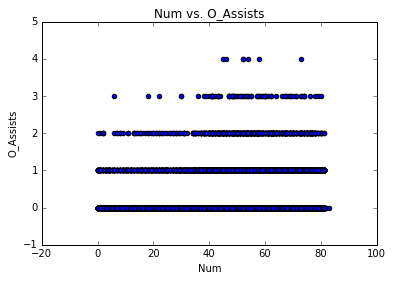

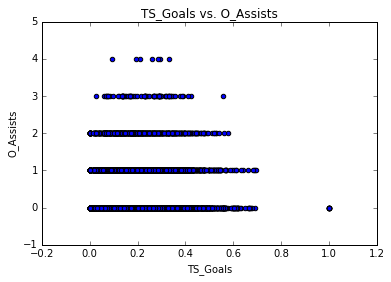

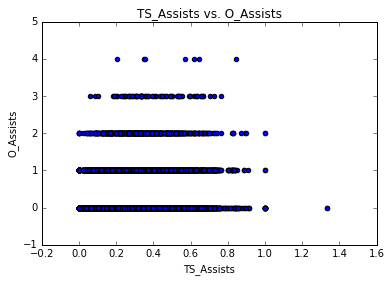

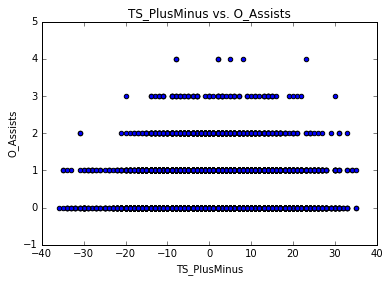

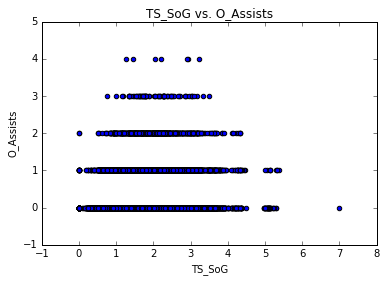

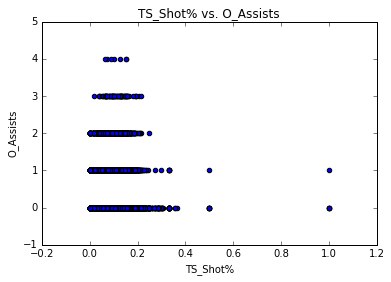

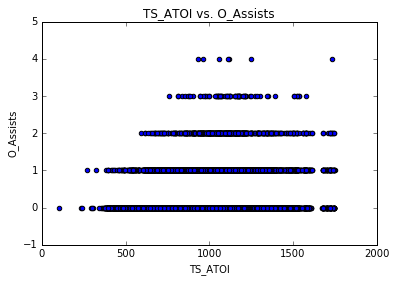

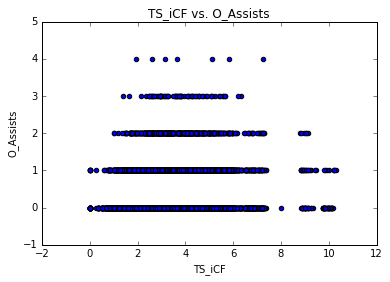

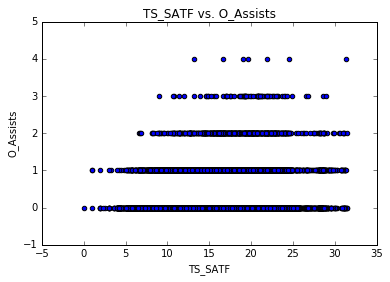

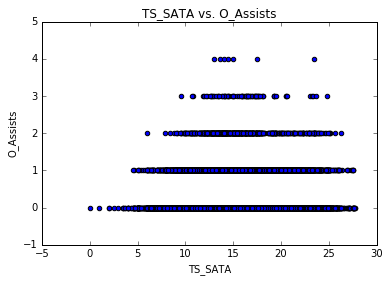

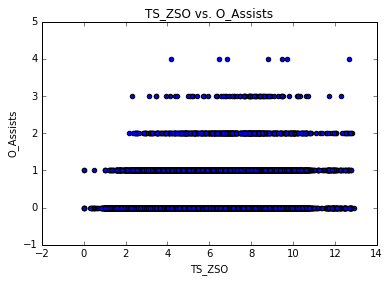

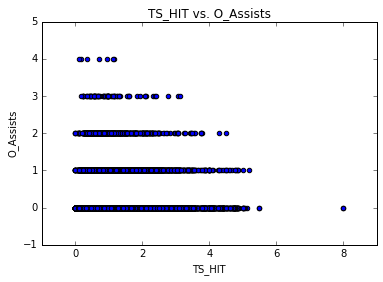

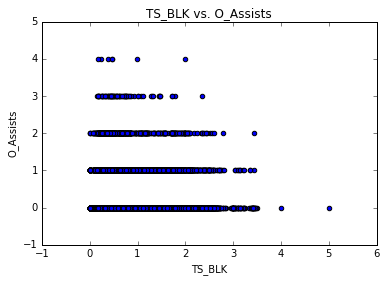

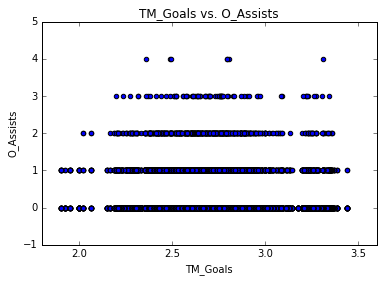

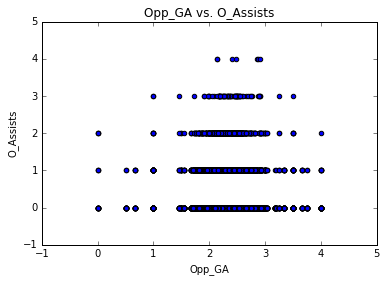

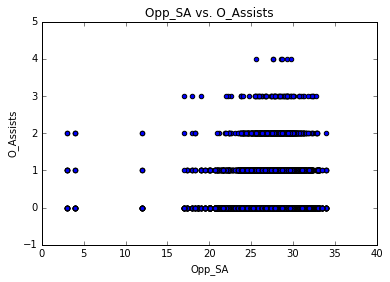

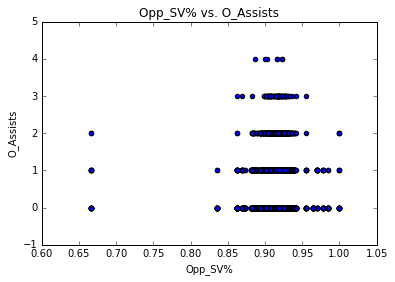

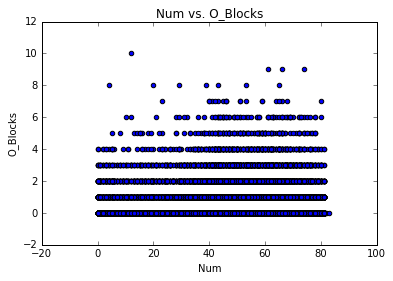

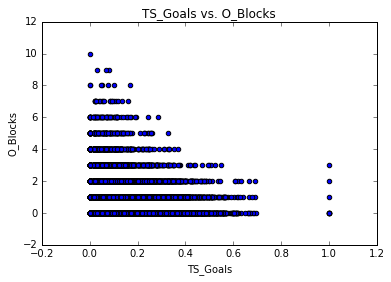

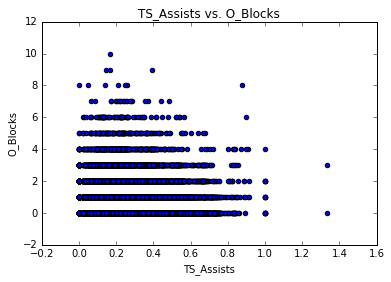

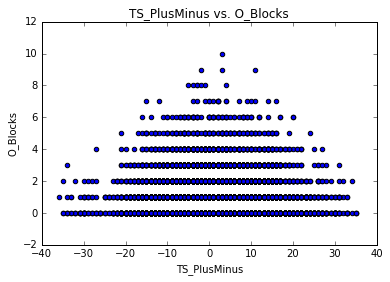

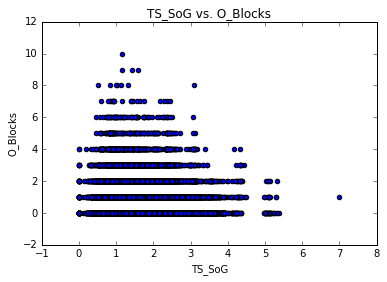

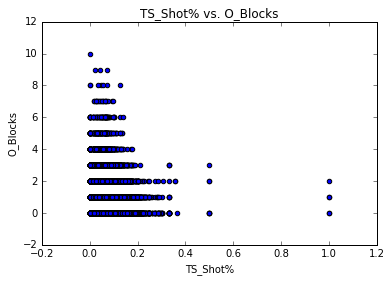

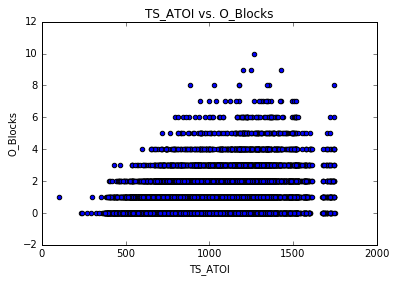

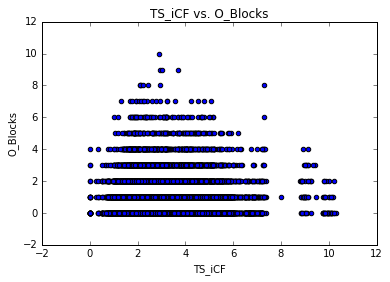

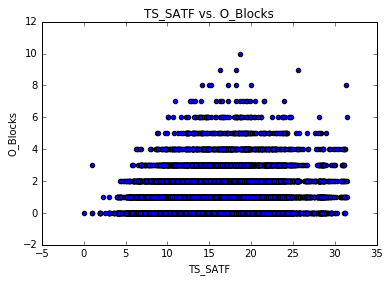

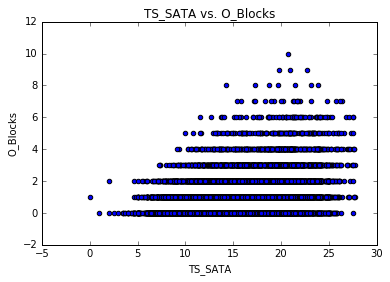

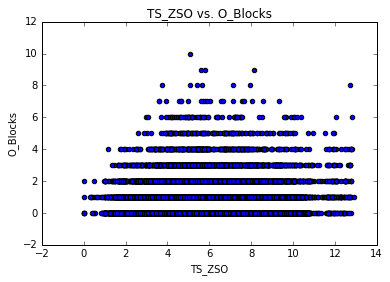

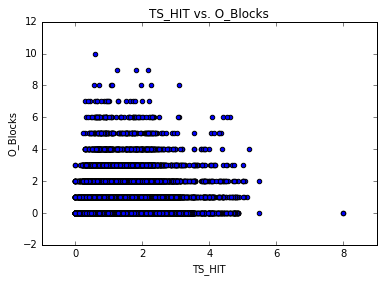

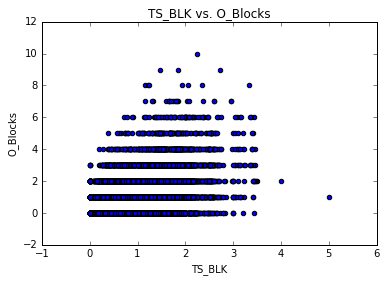

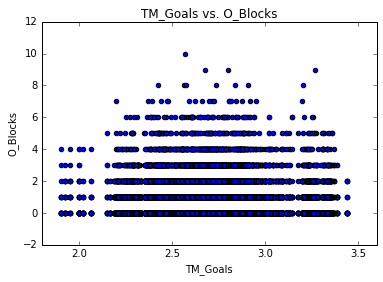

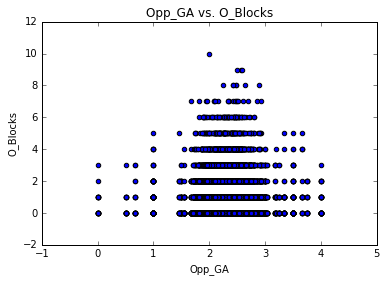

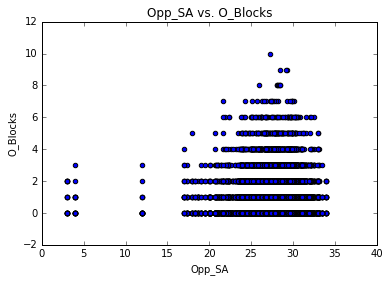

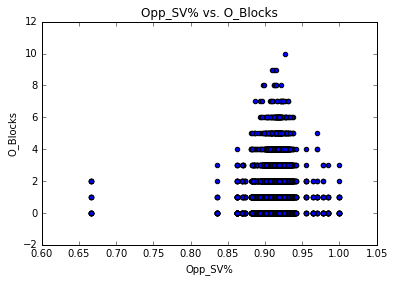

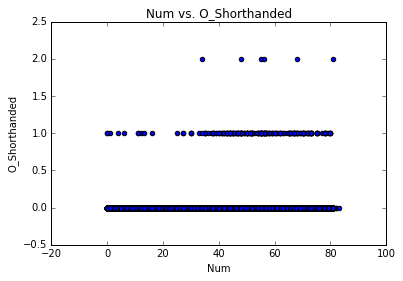

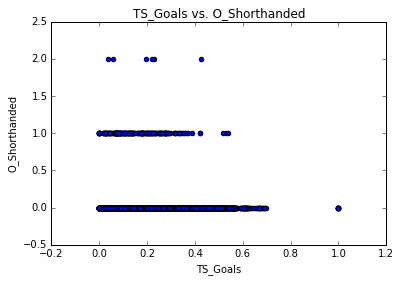

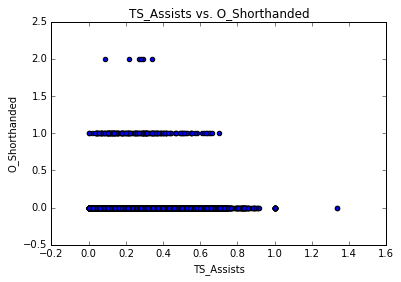

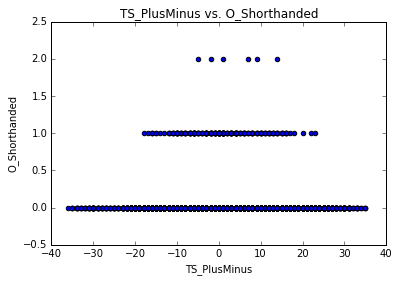

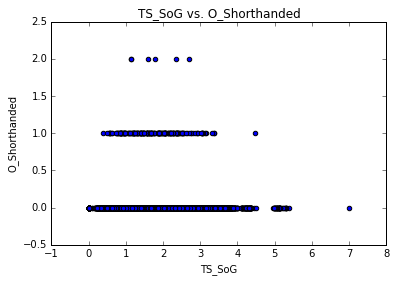

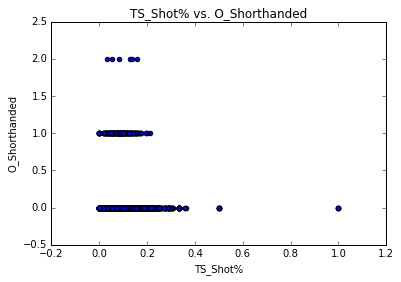

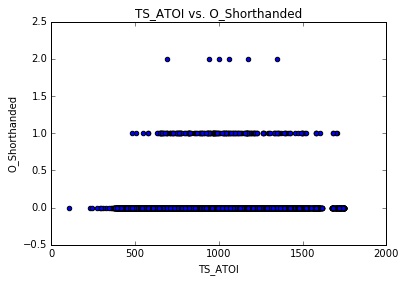

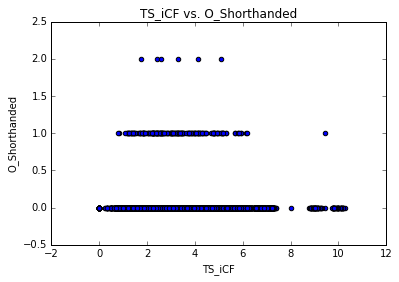

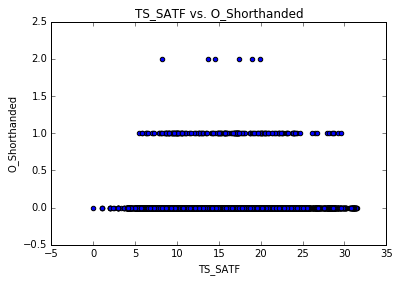

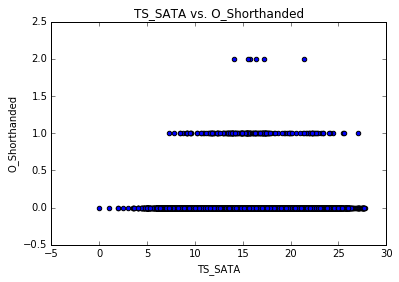

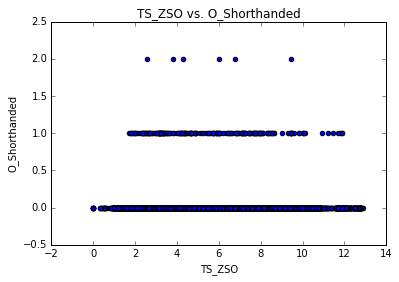

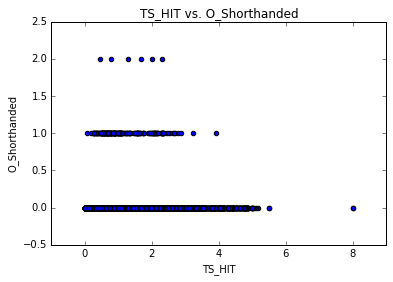

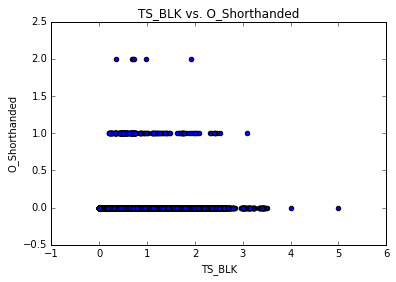

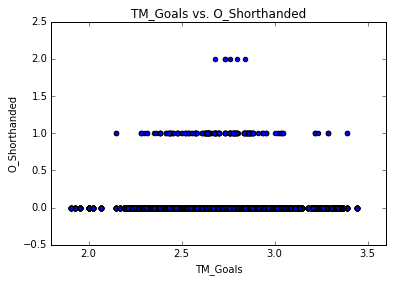

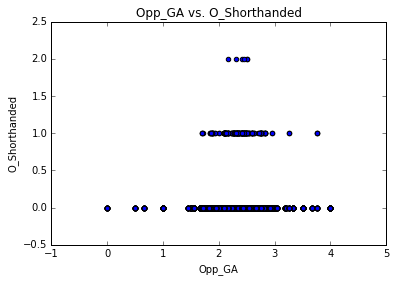

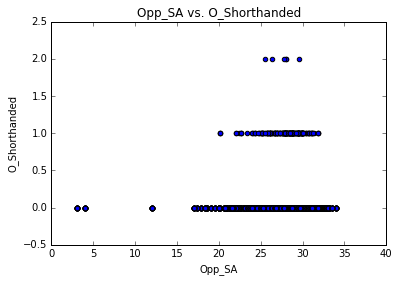

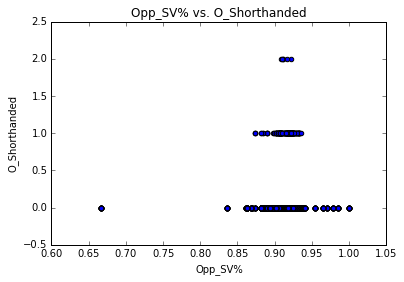

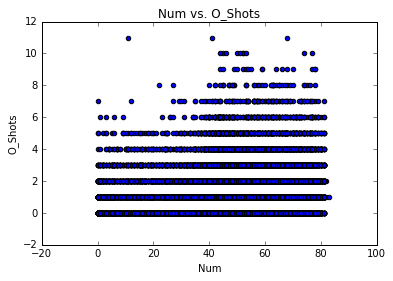

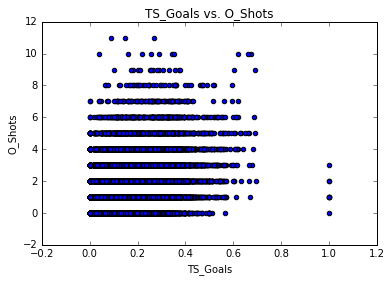

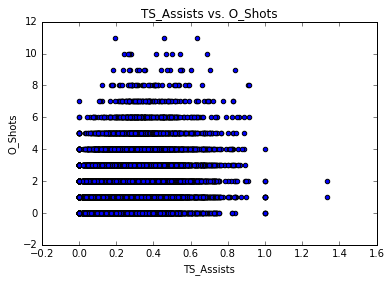

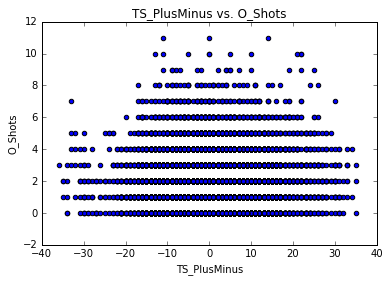

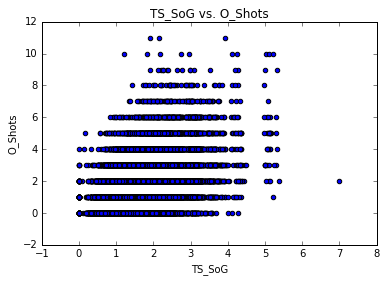

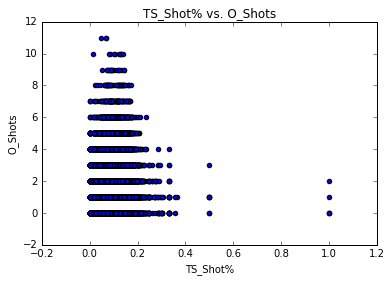

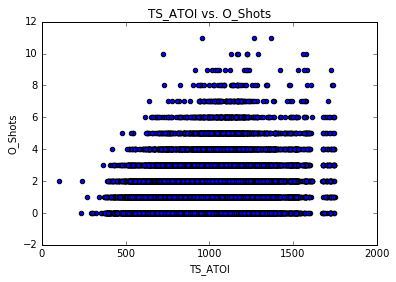

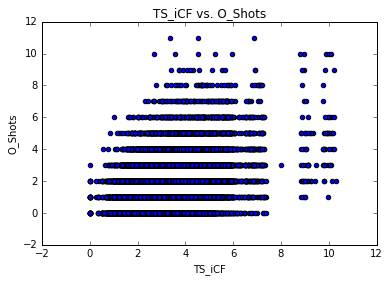

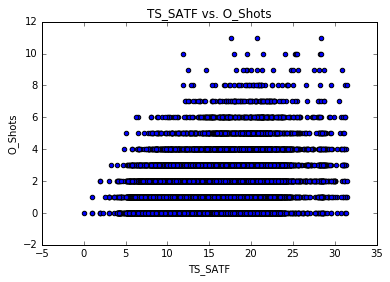

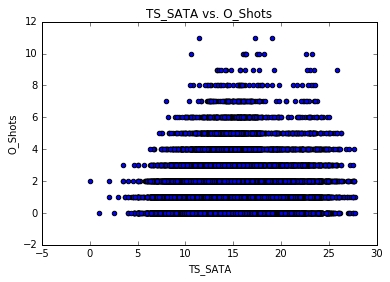

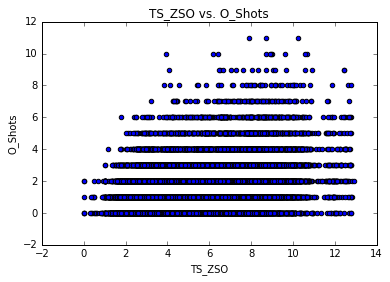

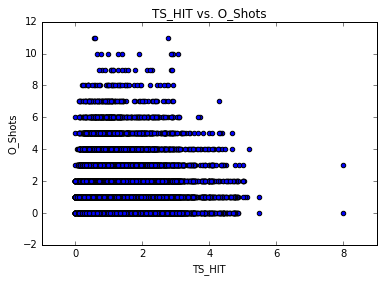

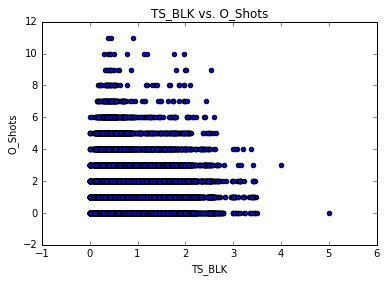

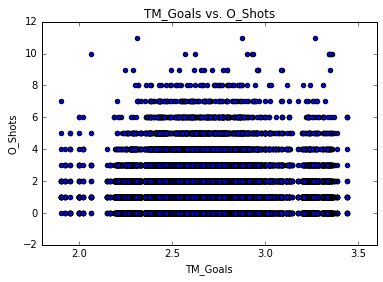

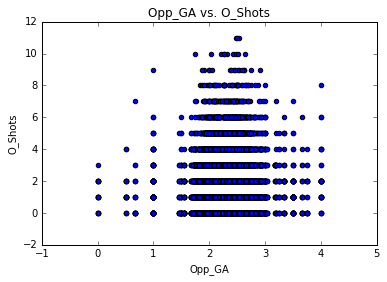

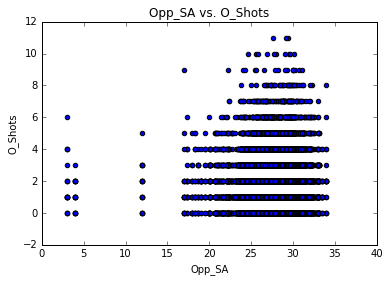

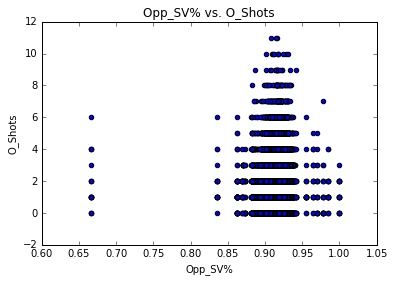

In [41]:
for output in outputs:
    for feature in features:
        X.plot.scatter(x=feature, y=output)
        plt.title(feature + " vs. " + output)
plt.show()

### Get just numerical data and show covariance

In [21]:
corr = data.corr()
ICD.display(corr)

print('\Correlation of outputs\n')
for output in outputs:
    print(output)
    c = corr[output]
    c = c.sort_values(ascending=False)
    ICD.display(c)
    print('\n')

,Num,O_Goals,O_Assists,O_Blocks,O_Shorthanded,O_Shots,TS_Goals,TS_Assists,TS_PlusMinus,TS_SoG,TS_Shot%,TS_ATOI,TS_iCF,TS_SATF,TS_SATA,TS_ZSO,TS_HIT,TS_BLK,TM_Goals,Opp_GA,Opp_SA,Opp_SV%
Num,1.000000,0.086721,0.106979,0.034742,0.025601,0.151277,0.293524,0.334490,0.083000,0.318409,0.221595,0.377294,0.315519,0.357409,0.342650,0.325353,-0.075596,0.077817,0.125857,0.037483,-0.010662,-0.040823
O_Goals,0.086721,1.000000,0.043077,-0.053794,0.119565,0.350267,0.214801,0.145400,0.036787,0.200977,0.136067,0.054790,0.172646,0.122930,-0.001485,0.136454,-0.037596,-0.105300,0.007347,0.003090,-0.009523,-0.012882
O_Assists,0.106979,0.043077,1.000000,0.014193,0.090358,0.111461,0.166266,0.232832,0.049193,0.187794,0.091794,0.176544,0.191732,0.227249,0.102639,0.230004,-0.083497,0.005629,0.009719,0.005350,-0.011934,-0.017385
O_Blocks,0.034742,-0.053794,0.014193,1.000000,-0.004366,-0.044918,-0.188907,0.005055,0.039983,-0.086539,-0.197318,0.317886,0.017022,0.167596,0.389984,0.100787,0.052127,0.495807,0.026618,0.013437,0.006596,-0.007136
O_Shorthanded,0.025601,0.119565,0.090358,-0.004366,1.000000,0.041709,0.013958,0.011669,0.008431,0.013234,0.011046,0.018456,0.009570,0.009848,0.028292,0.001786,-0.017022,0.011431,0.010931,0.019105,0.007708,-0.010451
O_Shots,0.151277,0.350267,0.111461,-0.044918,0.041709,1.000000,0.345427,0.301629,0.043592,0.435973,0.147468,0.216666,0.427549,0.322974,0.107484,0.331208,-0.062448,-0.069862,0.021118,0.029549,0.019618,-0.017285
TS_Goals,0.293524,0.214801,0.166266,-0.188907,0.013958,0.345427,1.000000,0.539799,0.205504,0.748389,0.775458,0.247953,0.643849,0.471011,0.044331,0.539620,-0.172385,-0.339894,0.126796,0.000954,0.004883,0.002220
TS_Assists,0.334490,0.145400,0.232832,0.005055,0.011669,0.301629,0.539799,1.000000,0.253254,0.618550,0.277945,0.598068,0.633614,0.750888,0.374527,0.769503,-0.269136,0.021828,0.155313,-0.000446,0.004648,0.004834
TS_PlusMinus,0.083000,0.036787,0.049193,0.039983,0.008431,0.043592,0.205504,0.253254,1.000000,0.084839,0.184651,0.166885,0.096081,0.187203,0.094007,0.151725,-0.035592,0.091147,0.372402,-0.007496,0.005410,0.020269
TS_SoG,0.318409,0.200977,0.187794,-0.086539,0.013234,0.435973,0.748389,0.618550,0.084839,1.000000,0.288448,0.469370,0.939503,0.696120,0.231724,0.704290,-0.140319,-0.148378,0.058146,0.004923,-0.000263,-0.002962


\Correlation of outputs

O_Goals


O_Goals          1.000000
O_Shots          0.350267
TS_Goals         0.214801
TS_SoG           0.200977
TS_iCF           0.172646
TS_Assists       0.145400
TS_ZSO           0.136454
TS_Shot%         0.136067
TS_SATF          0.122930
O_Shorthanded    0.119565
Num              0.086721
TS_ATOI          0.054790
O_Assists        0.043077
TS_PlusMinus     0.036787
TM_Goals         0.007347
Opp_GA           0.003090
TS_SATA         -0.001485
Opp_SA          -0.009523
Opp_SV%         -0.012882
TS_HIT          -0.037596
O_Blocks        -0.053794
TS_BLK          -0.105300
Name: O_Goals, dtype: float64



O_Assists


O_Assists        1.000000
TS_Assists       0.232832
TS_ZSO           0.230004
TS_SATF          0.227249
TS_iCF           0.191732
TS_SoG           0.187794
TS_ATOI          0.176544
TS_Goals         0.166266
O_Shots          0.111461
Num              0.106979
TS_SATA          0.102639
TS_Shot%         0.091794
O_Shorthanded    0.090358
TS_PlusMinus     0.049193
O_Goals          0.043077
O_Blocks         0.014193
TM_Goals         0.009719
TS_BLK           0.005629
Opp_GA           0.005350
Opp_SA          -0.011934
Opp_SV%         -0.017385
TS_HIT          -0.083497
Name: O_Assists, dtype: float64



O_Blocks


O_Blocks         1.000000
TS_BLK           0.495807
TS_SATA          0.389984
TS_ATOI          0.317886
TS_SATF          0.167596
TS_ZSO           0.100787
TS_HIT           0.052127
TS_PlusMinus     0.039983
Num              0.034742
TM_Goals         0.026618
TS_iCF           0.017022
O_Assists        0.014193
Opp_GA           0.013437
Opp_SA           0.006596
TS_Assists       0.005055
O_Shorthanded   -0.004366
Opp_SV%         -0.007136
O_Shots         -0.044918
O_Goals         -0.053794
TS_SoG          -0.086539
TS_Goals        -0.188907
TS_Shot%        -0.197318
Name: O_Blocks, dtype: float64



O_Shorthanded


O_Shorthanded    1.000000
O_Goals          0.119565
O_Assists        0.090358
O_Shots          0.041709
TS_SATA          0.028292
Num              0.025601
Opp_GA           0.019105
TS_ATOI          0.018456
TS_Goals         0.013958
TS_SoG           0.013234
TS_Assists       0.011669
TS_BLK           0.011431
TS_Shot%         0.011046
TM_Goals         0.010931
TS_SATF          0.009848
TS_iCF           0.009570
TS_PlusMinus     0.008431
Opp_SA           0.007708
TS_ZSO           0.001786
O_Blocks        -0.004366
Opp_SV%         -0.010451
TS_HIT          -0.017022
Name: O_Shorthanded, dtype: float64



O_Shots


O_Shots          1.000000
TS_SoG           0.435973
TS_iCF           0.427549
O_Goals          0.350267
TS_Goals         0.345427
TS_ZSO           0.331208
TS_SATF          0.322974
TS_Assists       0.301629
TS_ATOI          0.216666
Num              0.151277
TS_Shot%         0.147468
O_Assists        0.111461
TS_SATA          0.107484
TS_PlusMinus     0.043592
O_Shorthanded    0.041709
Opp_GA           0.029549
TM_Goals         0.021118
Opp_SA           0.019618
Opp_SV%         -0.017285
O_Blocks        -0.044918
TS_HIT          -0.062448
TS_BLK          -0.069862
Name: O_Shots, dtype: float64

,GameNum,GameName,Player,DateTimestamp,Num,O_Goals,O_Assists,O_Blocks,O_Shorthanded,O_Shots,TS_Goals,TS_Assists,TS_PlusMinus,TS_SoG,TS_Shot%,TS_ATOI,TS_iCF,TS_SATF,TS_SATA,TS_ZSO,TS_HIT,TS_BLK,TM_Goals,Opp_GA,Opp_SA,Opp_SV%
40073,1113.0,2015_1113,Casey Nelson,1.458968e+09,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.378378,2.555556,27.000000,0.905350
40689,1130.0,2015_1130,Casey Nelson,1.459141e+09,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,1.0,1.000000,0.0,993.000000,3.000000,20.00,8.000000,8.000000,1.000000,0.000000,2.386667,2.566667,26.933333,0.904703
41177,1143.0,2015_1143,Casey Nelson,1.459228e+09,2.0,0.0,2.0,2.0,0.0,0.0,0.0,1.000000,3.0,0.500000,0.0,912.000000,3.000000,21.50,6.000000,6.000000,0.500000,0.000000,2.381579,1.857143,28.571429,0.935000
41371,1149.0,2015_1149,Casey Nelson,1.459400e+09,3.0,0.0,0.0,0.0,0.0,2.0,0.0,1.333333,1.0,0.333333,0.0,889.666667,2.666667,18.00,7.666667,5.000000,1.000000,0.666667,2.402597,2.615385,25.153846,0.896024
42185,1171.0,2015_1171,Casey Nelson,1.459573e+09,4.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.0,0.750000,0.0,854.750000,2.500000,16.75,7.000000,5.250000,0.750000,0.500000,2.423077,1.818182,21.636364,0.915966
42905,1191.0,2015_1191,Casey Nelson,1.459832e+09,5.0,0.0,0.0,1.0,0.0,1.0,0.0,0.800000,0.0,0.800000,0.0,846.400000,2.200000,14.20,7.600000,5.200000,0.800000,0.400000,2.443038,2.125000,27.857143,0.923718
44018,1222.0,2015_1222,Casey Nelson,1.460178e+09,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.666667,0.0,0.833333,0.0,836.500000,2.166667,13.00,7.833333,5.166667,0.666667,0.500000,2.432099,2.000000,24.500000,0.918367
